In [1]:
using NeuralVerification, LazySets, Test, LinearAlgebra, GLPKMathProgInterface
import NeuralVerification: ReLU, Id

In [3]:
blue_small_file_fc2 = "$(@__DIR__)models/network_blue2-100_3x20_fc2.nnet"
small_blue_fc2 = read_nnet(blue_small_file_fc2, last_layer_activation = ReLU())


Network(NeuralVerification.Layer[Layer{ReLU,Float64}([-0.0640618 0.0746965 … 0.00620889 0.114851; -0.109833 0.138668 … 0.150928 0.0742732; … ; 0.0930569 -0.0220029 … 0.118097 -0.118455; 0.139604 -0.0756239 … 0.0511713 0.135878], [0.179296, 0.179928, 0.170453, 0.35613, 0.30079, 0.187118, 0.0504727, 0.0876301, 0.148765, 0.0983939, 0.192611, 0.263518, 0.104369, 0.226092, 0.196078, 0.253542, 0.169634, 0.202692, 0.114288, 0.290042], ReLU()), Layer{ReLU,Float64}([0.0523602 -0.235193 … -0.203035 0.197968; 0.239292 0.233364 … 0.209407 -0.118983; … ; -0.0692344 0.00297916 … -0.0806789 0.177225; 0.0797391 0.0168035 … 0.0476786 0.0470451], [0.190043, 0.16335, 0.00456973, 0.0958131, 0.151256, 0.0952264, 0.146641, 0.312956, 0.15211, 0.174194, 0.235844, 0.164197, 0.0244476, 0.276519, 0.293546, 0.172382, 0.201753, 0.200557, 0.321582, 0.0806317], ReLU()), Layer{ReLU,Float64}([-0.0371334 0.0452311 … 0.0358232 -0.0178109; 0.110631 -0.0822517 … -0.203955 0.157829; … ; 0.448335 -0.0562174 … 0.0590715 0.11

In [82]:
redChannelIndices = [x for x in 1:28*28*3 if x % 3 == 1]
greenChannelIndices = [x for x in 1:28*28*3 if x % 3 == 2]
blueChannelIndices = [x for x in 1:28*28*3 if x % 3 == 0];

lower = zeros(2352)
upper = zeros(2352)

lower[redChannelIndices] .= 0.0/255.0
upper[redChannelIndices] .= 25.0/255.0


lower[greenChannelIndices] .= 0.0/255.0
upper[greenChannelIndices] .= 25.0/255.0

lower[blueChannelIndices] .= 150.0/255.0
upper[blueChannelIndices] .= 200.0/255.0;
                            

In [83]:
X = Hyperrectangle(low=lower, high=upper)

Hyperrectangle{Float64}([0.0490196, 0.0490196, 0.686275, 0.0490196, 0.0490196, 0.686275, 0.0490196, 0.0490196, 0.686275, 0.0490196  …  0.686275, 0.0490196, 0.0490196, 0.686275, 0.0490196, 0.0490196, 0.686275, 0.0490196, 0.0490196, 0.686275], [0.0490196, 0.0490196, 0.0980392, 0.0490196, 0.0490196, 0.0980392, 0.0490196, 0.0490196, 0.0980392, 0.0490196  …  0.0980392, 0.0490196, 0.0490196, 0.0980392, 0.0490196, 0.0490196, 0.0980392, 0.0490196, 0.0490196, 0.0980392])

## CAV's from blue network

In [84]:
PC1 = [-0.        ,  0.00870545,  0.51726144, -0.19648717, -0.09713438,
        0.18778225,  0.39492557, -0.26334597,  0.24183058, -0.2923064 ,
        0.31859124, -0.05246964, -0.04692712, -0.26515304,  0.0374543 ,
        0.06029455, -0.24766083,  0.11671228,  0.12417367, -0.0874142 ]

PC_weighted_average = [ 0.        ,  0.02626035,  0.16567832, -0.09166782,  0.03655415,
       -0.00327287,  0.18694751, -0.07981452,  0.13997817, -0.01545383,
        0.08288144, -0.12020836, -0.08681162, -0.1123223 , -0.00986534,
       -0.08170739, -0.10430208,  0.0953546 ,  0.02571293,  0.07669167]

mean_cav = [ 0.        , -0.01028122, -0.41807324,  0.25389871,  0.09259489,
       -0.26955684, -0.34073803,  0.22316338, -0.30103159,  0.09841387,
       -0.45947057,  0.11039459,  0.01105305,  0.21602617, -0.08064095,
        0.02324397,  0.32226614, -0.23212242, -0.20512506, -0.02124688];


# PC1

Property: The image of the blue box falls on the PC1 halfspace side.

In [101]:
b = [0.0];

# HOOOOOOOLDS

In [104]:
Y = HPolytope(-PC1', b)
#solver = ExactReach()
solver = NSVerify()
problem_av2 = Problem(small_blue_fc2, X, Y);
timed_result = @timed solve(solver, problem_av2)
print(" - Time: " * string(timed_result[2]) * " s")
print(" - Output: ")
print(timed_result[1])
println("")

#counter_example = timed_result[1].counter_example; 

 - Time: 1989.1997775 s - Output: CounterExampleResult(:unknown, Float64[])


In [90]:
Y = HPolytope(-PC_weighted_average', b)
#solver = DLV()
solver = NSVerify()
problem_av2 = Problem(small_blue_fc2, X, Y);
timed_result = @timed solve(solver, problem_av2)
print(" - Time: " * string(timed_result[2]) * " s")
print(" - Output: ")
print(timed_result[1])
println("")

counter_example = timed_result[1].counter_example;

 - Time: 25.016895512 s - Output: ReachabilityResult(:violated, Hyperrectangle{Float64}[Hyperrectangle{Float64}([5.42854, 28.9967, 0.0, 60.0377, 57.3178, 31.8605, 60.9245, 37.9545, 39.3195, 56.7513, 39.9325, 47.8219, 44.4301, 43.7427, 44.4756, 43.9335, 46.5149, 43.2956, 31.9348, 53.6821], [5.42854, 28.9967, 59.5127, 60.0377, 57.3178, 31.8605, 60.9245, 37.9545, 39.3195, 56.7513, 39.9325, 47.8219, 44.4301, 43.7427, 44.4756, 43.9335, 46.5149, 43.2956, 31.9348, 53.6821])])


ErrorException: type ReachabilityResult has no field counter_example

In [ ]:
Y = HPolytope(-PC_weighted_average', b)
#solver = DLV()
solver = NSVerify()
problem_av2 = Problem(small_blue_fc2, X, Y);
timed_result = @timed solve(solver, problem_av2)
print(" - Time: " * string(timed_result[2]) * " s")
print(" - Output: ")
print(timed_result[1])
println("")

counter_example = timed_result[1].counter_example;

In [95]:
Y = HPolytope(-mean_cav', b)
#solver = ExactReach()
solver = NSVerify()
problem_av2 = Problem(small_blue_fc2, X, Y);
timed_result = @timed solve(solver, problem_av2)
print(" - Time: " * string(timed_result[2]) * " s")
print(" - Output: ")
print(timed_result[1])
println("")

counter_example = timed_result[1].counter_example;

 - Time: 26.143992617 s - Output: CounterExampleResult(:violated, [0.0, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0, 0.0980392, 0.588235, 0.0980392, 0.0, 0.784314, 0.0, 0.0, 0.784314, 0.0, 0.0980392, 0.784314, 0.0, 0.0, 0.784314, 0.0, 0.0980392, 0.784314, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.784314, 0.0, 0.0, 0.784314, 0.0, 0.0, 0.784314, 0.0, 0.0, 0.784314, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.784314, 0.0, 0.0980392, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0980392, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0980392, 0.588235, 0.0, 0.0, 0.784314, 0.0, 0.0980392, 0.588235, 0.0980392, 0.0, 0.784314, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.784314, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0, 0.0, 0.784314, 0.0, 0.0980392, 0.784314, 0.0, 0.0, 0.784314, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.784314, 0.0980392, 0.0, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588

, 0.0980392, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0980392, 0.588235, 0.0, 0.0, 0.588235, 0.0980392, 0.0, 0.588235, 0.0980392, 0.0, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0980392, 0.588235, 0.0, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.784314, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.784314, 0.0980392, 0.0980392, 0.784314, 0.0980392, 0.0980392, 0.784314, 0.0, 0.0980392, 0.784314, 0.0980392, 0.0980392, 0.588235, 0.0980392, 0.0980392, 0.784314, 0.0980392, 0.0980392, 0.784314, 0.0980392, 0.0, 0.784314, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0980392, 0.588235, 0.0, 0.0, 0.588235, 0.0980392, 0.0, 0.588235, 0.0, 0.0, 0.588235, 0.0, 0.0, 0.784

In [96]:
counter_example = timed_result[1].counter_example;

In [97]:
using PyPlot

In [98]:
red_chan = counter_example[redChannelIndices]
green_chan = counter_example[greenChannelIndices]
blue_chan = counter_example[blueChannelIndices]


view_counter = zeros(28,28,3)

view_counter[:,:,1] = reshape(red_chan, 28, 28)'#*255.0
view_counter[:,:,2] = reshape(green_chan, 28, 28)'#.*255.0
view_counter[:,:,3] = reshape(blue_chan, 28, 28)'#.*255.0

28×28 Adjoint{Float64,Array{Float64,2}}:
 0.588235  0.588235  0.588235  0.784314  …  0.784314  0.588235  0.588235
 0.784314  0.784314  0.784314  0.588235     0.588235  0.784314  0.784314
 0.588235  0.784314  0.588235  0.784314     0.588235  0.588235  0.784314
 0.588235  0.588235  0.588235  0.588235     0.784314  0.588235  0.766177
 0.588235  0.784314  0.588235  0.588235     0.588235  0.784314  0.784314
 0.588235  0.588235  0.784314  0.588235  …  0.784314  0.588235  0.784314
 0.588235  0.588235  0.588235  0.588235     0.784314  0.784314  0.588235
 0.588235  0.588235  0.588235  0.588235     0.588235  0.588235  0.588235
 0.588235  0.588235  0.588235  0.588235     0.784314  0.784314  0.588235
 0.588235  0.588235  0.588235  0.588235     0.784314  0.588235  0.588235
 0.588235  0.588235  0.588235  0.588235  …  0.588235  0.588235  0.588235
 0.784314  0.588235  0.588235  0.588235     0.588235  0.588235  0.588235
 0.588235  0.588235  0.588235  0.588235     0.784314  0.588235  0.588235
 ⋮        

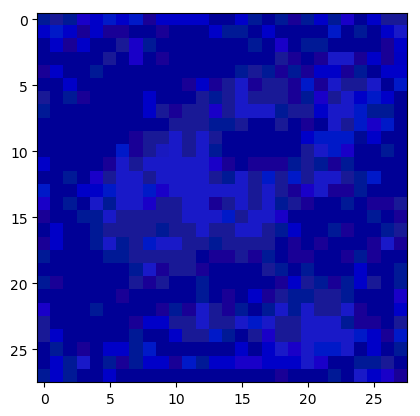

PyObject <matplotlib.image.AxesImage object at 0x127646710>

In [99]:
imshow(view_counter)

In [100]:
counter_example ∈ X

true

### conclusion: